<a href="https://colab.research.google.com/github/AntonSimen06/AntonSimen06/blob/main/magnetization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qiskit

     |████████████████████████████████| 6.5 MB 25.9 MB/s 
     |████████████████████████████████| 18.0 MB 77 kB/s 
     |████████████████████████████████| 238 kB 70.4 MB/s 
     |████████████████████████████████| 200 kB 52.2 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 50.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.8 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 943 kB 50.3 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
     |████████████████████████████████| 3.6 MB 50.7 MB/s 
     |████████████████████████████████| 113 kB 57.8 MB/s 
  Created wheel for qiskit: filename=qiskit-0.34.2-py3-none-any.whl size=11805 sha256=e0f5e6beaa8ee638578834da67b87a915cc642700fd03f37e2cd6e54c27aadff
  Stored in directory: /root/.cache/pip/wheels/62/77/65/cda6eedfdd2a525bd3f479a4386930ae3088a1eb01f8c9

In [2]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

In [45]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')

In [71]:
def circ(qubit_medido, theta, phi, lam):
  qc = QuantumCircuit(qr,cr)

  qc.u(theta,phi,lam,qr)
  qc.p(lam,qr)

  qc.barrier()

  # medindo nas bases Z, X e Y.
  qc.h(qr[1])
  qc.rx(np.pi/2,qr[2])

  qc.barrier()
  qc.measure(qr[qubit_medido],cr[0])
  return qc

circ(qubit_medido=1, theta=np.pi/2, phi=0, lam=0.4).draw()

┌──────────────┐┌────────┐ ░             ░    
q_0: ┤ U(π/2,0,0.4) ├┤ P(0.4) ├─░─────────────░────
     ├──────────────┤├────────┤ ░    ┌───┐    ░ ┌─┐
q_1: ┤ U(π/2,0,0.4) ├┤ P(0.4) ├─░────┤ H ├────░─┤M├
     ├──────────────┤├────────┤ ░ ┌──┴───┴──┐ ░ └╥┘
q_2: ┤ U(π/2,0,0.4) ├┤ P(0.4) ├─░─┤ Rx(π/2) ├─░──╫─
     └──────────────┘└────────┘ ░ └─────────┘ ░  ║ 
c: 1/════════════════════════════════════════════╩═
                                                 0

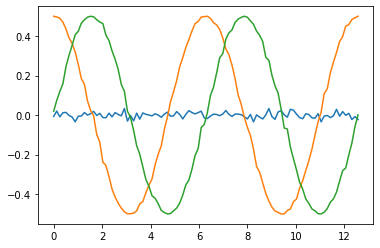

In [72]:
mag_x, mag_y, mag_z = [], [], []
simulador = Aer.get_backend('qasm_simulator')

lambs = np.linspace(0, 4*np.pi, 100)

for i in lambs:

  qc_z = circ( qubit_medido = 0, theta=np.pi/2, phi=0, lam=i )
  qc_x = circ( qubit_medido = 1,  theta=np.pi/2, phi=0, lam=i )
  qc_y = circ( qubit_medido = 2,  theta=np.pi/2, phi=0, lam=i )
 
  counts_z = execute(qc_z, backend=simulador, shots=1024).result().get_counts(qc_z)

  if '0' not in counts_z:
    counts_z['0']=0
  if '1' not in counts_z:
    counts_z['1']=0

  mag_z.append(((counts_z['0']/1024) - (counts_z['1']/1024))/2)

  counts_x = execute(qc_x, backend=simulador, shots=1024).result().get_counts(qc_x)

  if '0' not in counts_x:
    counts_x['0']=0
  if '1' not in counts_x:
    counts_x['1']=0

  mag_x.append(((counts_x['0']/1024) - (counts_x['1']/1024))/2)


  counts_y = execute(qc_y, backend=simulador, shots=1024).result().get_counts(qc_y)

  if '0' not in counts_y:
    counts_y['0']=0
  if '1' not in counts_y:
    counts_y['1']=0

  mag_y.append(((counts_y['0']/1024) - (counts_y['1']/1024))/2)

plt.plot(lambs, mag_z)
plt.plot(lambs, mag_x)
plt.plot(lambs, mag_y)

In [73]:
circuito = circ(qubit_medido=1, theta=np.pi/2, phi=0, lam=np.pi/4)

check = execute(circuito, backend=simulador, shots=1000).result().get_counts(circuito)



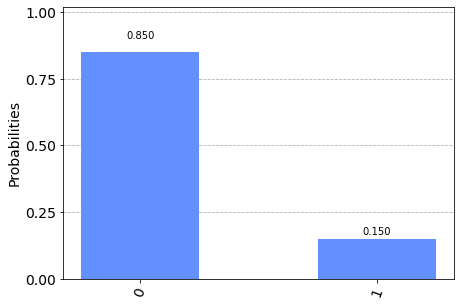

In [74]:
from qiskit.visualization import plot_histogram
plot_histogram(check)